Import

In [149]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

Data sebelumnya dilakukan dengan join semua table berdasarkan id nya, dari mulai category, education, marital, dan status, ke table customer_data_history. sehingga menghasilkan csv `CLEAN_customer_data_history`.

In [150]:
df = pd.read_csv('CLEAN_customer_data_history.csv')
df.head()

,Card Category,Education Level,Gender,Income Category,Marital Status,Status,Avg Open To Buy,Avg Utilization Ratio,Clientnum,Contacts Count 12 mon,Credit Limit,Customer Age,Dependent count,Months Inactive 12 mon,Months on book,Total Relationship Count,Total Revolving Bal,Total Trans Amt,Total Trans Ct
0,Blue,High School,M,$60K - $80K,Married,Existing Customer,11914.0,0.061,768805383,3,12691.0,45,3,1,39,5,777,1144,42
1,Blue,Graduate,F,Less than $40K,Single,Existing Customer,7392.0,0.105,818770008,2,8256.0,49,5,1,44,6,864,1291,33
2,Blue,Graduate,M,$80K - $120K,Married,Existing Customer,3418.0,0.000,713982108,0,3418.0,51,3,1,36,4,0,1887,20
3,Blue,High School,F,Less than $40K,Unknown,Existing Customer,796.0,0.760,769911858,1,3313.0,40,4,4,34,3,2517,1171,20
4,Blue,Uneducated,M,$60K - $80K,Married,Existing Customer,4716.0,0.000,709106358,0,4716.0,40,3,1,21,5,0,816,28


In [151]:
df.columns

Index(['Card Category', 'Education Level', 'Gender', 'Income Category',
       'Marital Status', 'Status', 'Avg Open To Buy', 'Avg Utilization Ratio',
       'Clientnum', 'Contacts Count 12 mon', 'Credit Limit', 'Customer Age',
       'Dependent count', 'Months Inactive 12 mon', 'Months on book',
       'Total Relationship Count', 'Total Revolving Bal', 'Total Trans Amt',
       'Total Trans Ct'],
      dtype='object')

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Card Category             10127 non-null  object 
 1   Education Level           10127 non-null  object 
 2   Gender                    10127 non-null  object 
 3   Income Category           10127 non-null  object 
 4   Marital Status            10127 non-null  object 
 5   Status                    10127 non-null  object 
 6   Avg Open To Buy           10127 non-null  float64
 7   Avg Utilization Ratio     10127 non-null  float64
 8   Clientnum                 10127 non-null  int64  
 9   Contacts Count 12 mon     10127 non-null  int64  
 10  Credit Limit              10127 non-null  float64
 11  Customer Age              10127 non-null  int64  
 12  Dependent count           10127 non-null  int64  
 13  Months Inactive 12 mon    10127 non-null  int64  
 14  Months

In [153]:
df.describe()

,Avg Open To Buy,Avg Utilization Ratio,Clientnum,Contacts Count 12 mon,Credit Limit,Customer Age,Dependent count,Months Inactive 12 mon,Months on book,Total Relationship Count,Total Revolving Bal,Total Trans Amt,Total Trans Ct
count,10127.000000,10127.000000,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7469.139637,0.274894,7.391776e+08,2.455317,8631.953698,46.325960,2.346203,2.341167,35.928409,3.812580,1162.814061,4404.086304,64.858695
std,9090.685324,0.275691,3.690378e+07,1.106225,9088.776650,8.016814,1.298908,1.010622,7.986416,1.554408,814.987335,3397.129254,23.472570
min,3.000000,0.000000,7.080821e+08,0.000000,1438.300000,26.000000,0.000000,0.000000,13.000000,1.000000,0.000000,510.000000,10.000000
25%,1324.500000,0.023000,7.130368e+08,2.000000,2555.000000,41.000000,1.000000,2.000000,31.000000,3.000000,359.000000,2155.500000,45.000000
50%,3474.000000,0.176000,7.179264e+08,2.000000,4549.000000,46.000000,2.000000,2.000000,36.000000,4.000000,1276.000000,3899.000000,67.000000
75%,9859.000000,0.503000,7.731435e+08,3.000000,11067.500000,52.000000,3.000000,3.000000,40.000000,5.000000,1784.000000,4741.000000,81.000000
max,34516.000000,0.999000,8.283431e+08,6.000000,34516.000000,73.000000,5.000000,6.000000,56.000000,6.000000,2517.000000,18484.000000,139.000000


In [172]:
df = df.drop(['Clientnum'], axis=1)

In [154]:
object_columns = df.select_dtypes(include='object').columns

for column in object_columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}:")
    print(unique_values)
    print()

Unique values in Card Category:
['Blue' 'Gold' 'Silver' 'Platinum']

Unique values in Education Level:
['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']

Unique values in Gender:
['M' 'F']

Unique values in Income Category:
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']

Unique values in Marital Status:
['Married' 'Single' 'Unknown' 'Divorced']

Unique values in Status:
['Existing Customer' 'Attrited Customer']



Feature Engineering

In [155]:
df['Status_int'] = df['Status'].replace({'Existing Customer': 1, 'Attrited Customer': 0})

In [156]:
age_ranges = {
    'Gen Z': (0, 24),
    'Millennial': (25, 40),
    'Gen X': (41, 55),
    'Baby Boomer': (56, 75),
    'Silent Generation': (76, 100)
}

df['Generation'] = pd.cut(df['Customer Age'], bins=[range[0]-1 for range in age_ranges.values()] + [max(range[1] for range in age_ranges.values())+1], labels=[generation for generation in age_ranges.keys()])

EDA

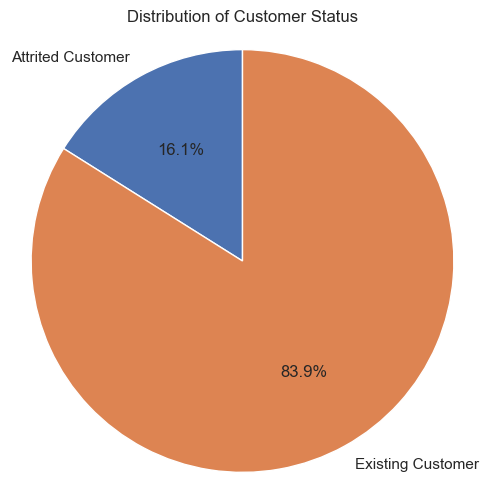

In [157]:
# Count the number of 'Attrited Customer' and 'Existing Customer'
attrited_count = df[df['Status'] == 'Attrited Customer'].shape[0]
existing_count = df[df['Status'] == 'Existing Customer'].shape[0]

# Create labels and counts for the pie chart
labels = ['Attrited Customer', 'Existing Customer']
counts = [attrited_count, existing_count]

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Customer Status')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [168]:
df.Clientnum

0        768805383
1        818770008
2        713982108
3        769911858
4        709106358
           ...    
10122    772366833
10123    710638233
10124    716506083
10125    717406983
10126    714337233
Name: Clientnum, Length: 10127, dtype: int64

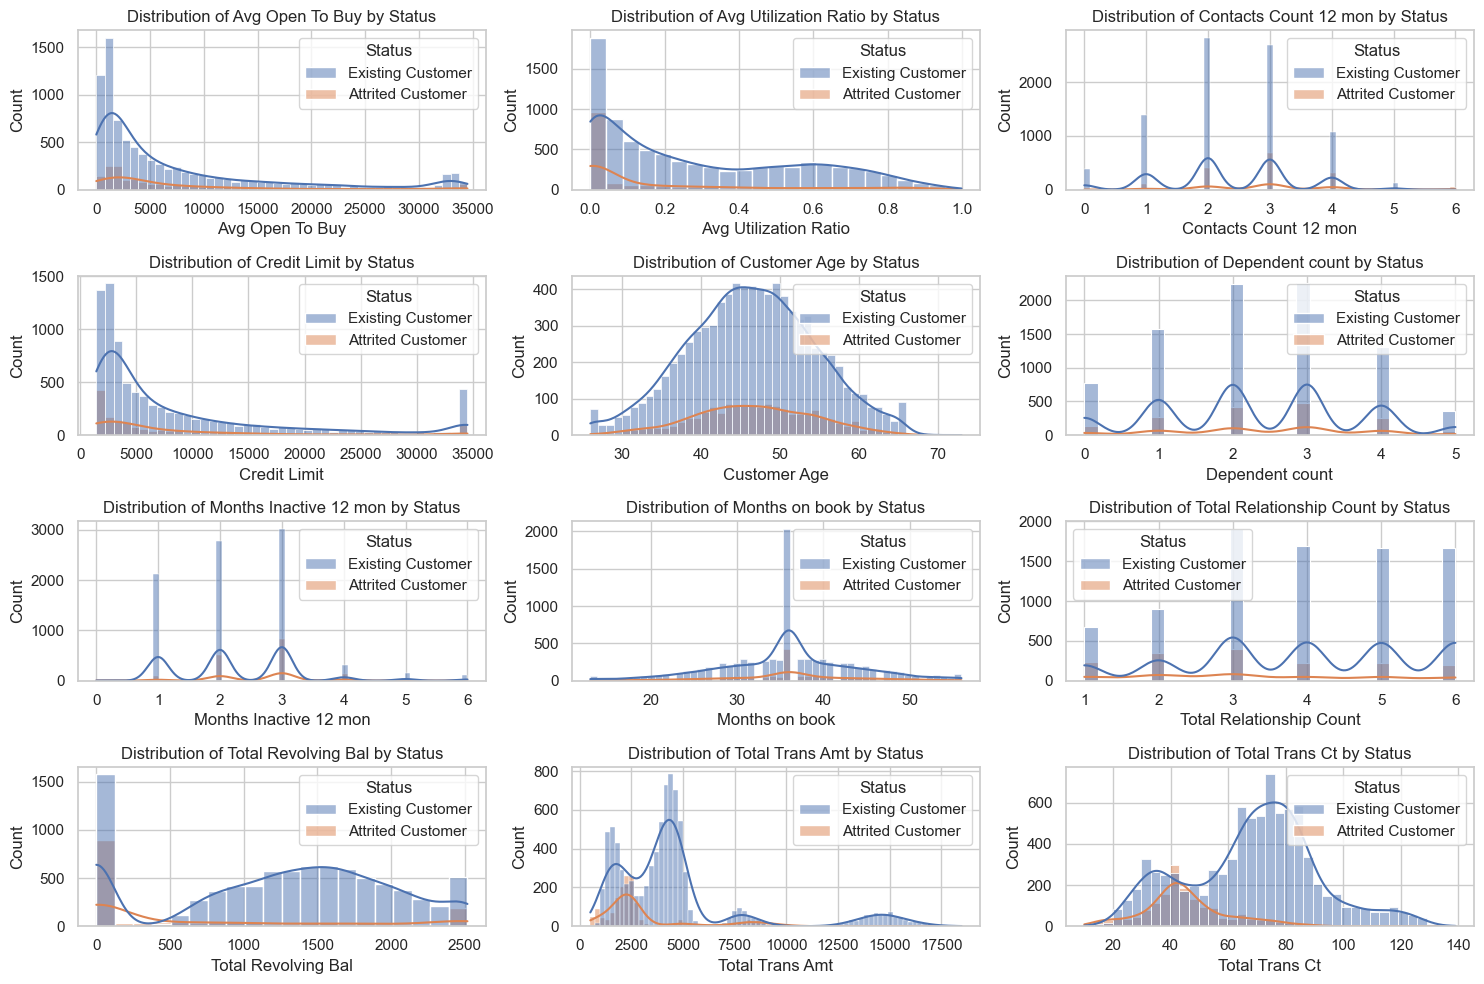

In [171]:
# Filter the dataframe to include only columns of numerical data type
# numerical_columns = df.select_dtypes(include='number').columns
numerical_columns = ['Avg Open To Buy', 'Avg Utilization Ratio',
       'Contacts Count 12 mon', 'Credit Limit', 'Customer Age',
       'Dependent count', 'Months Inactive 12 mon', 'Months on book',
       'Total Relationship Count', 'Total Revolving Bal', 'Total Trans Amt',
       'Total Trans Ct']

# Set the number of columns for subplots
num_cols = 3

# Calculate the number of rows needed based on the number of numerical columns and the number of columns for subplots
num_rows = (len(numerical_columns) + num_cols - 1) // num_cols

# Create subplots for histogram plots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Iterate over numerical columns and create histogram plots with KDE
for i, col in enumerate(numerical_columns):
    ax = axes[i]  # Select the current subplot
    sns.histplot(data=df, x=col, hue='Status', kde=True, ax=ax)
    ax.set_title(f'Distribution of {col} by Status')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

# Remove any unused subplots
if len(numerical_columns) < num_rows * num_cols:
    for j in range(len(numerical_columns), num_rows * num_cols):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

C:\Users\ichsan\AppData\Local\Temp\ipykernel_15568\4183446496.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


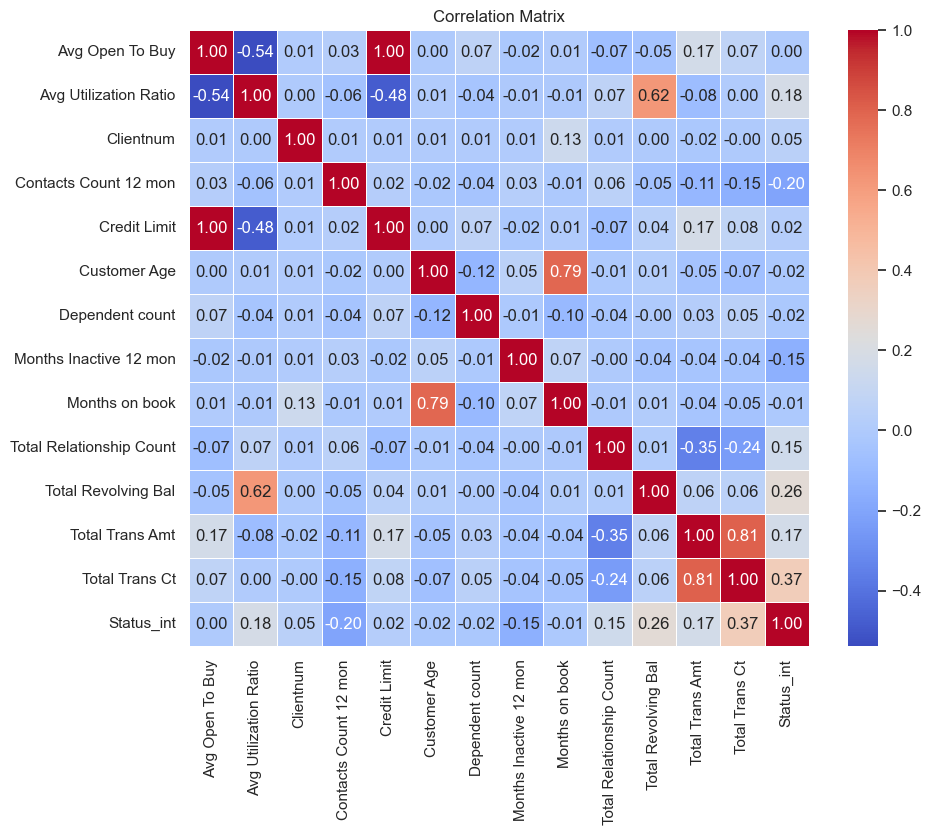

In [159]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [160]:
# Select the columns for feature analysis
selected_columns = ['Generation', 'Card Category', 'Education Level', 'Gender', 'Income Category', 'Marital Status']

# Calculate the summary statistics of selected features
feature_summary = df[selected_columns].describe(include='all')
feature_summary

,Generation,Card Category,Education Level,Gender,Income Category,Marital Status
count,10127,10127,10127,10127,10127,10127
unique,3,4,7,2,6,4
top,Gen X,Blue,Graduate,F,Less than $40K,Married
freq,6399,9436,3128,5358,3561,4687


In [161]:
# # Visualize the distribution of numeric features
# numeric_columns = ['Avg Open To Buy', 'Avg Utilization Ratio', 'Credit Limit', 'Customer Age', 'Dependent count',
#                    'Months Inactive 12 mon', 'Months on book', 'Total Relationship Count', 'Total Revolving Bal',
#                    'Total Trans Amt', 'Total Trans Ct']
# sns.set(style='ticks')
# sns.pairplot(df[numeric_columns])
# plt.show()

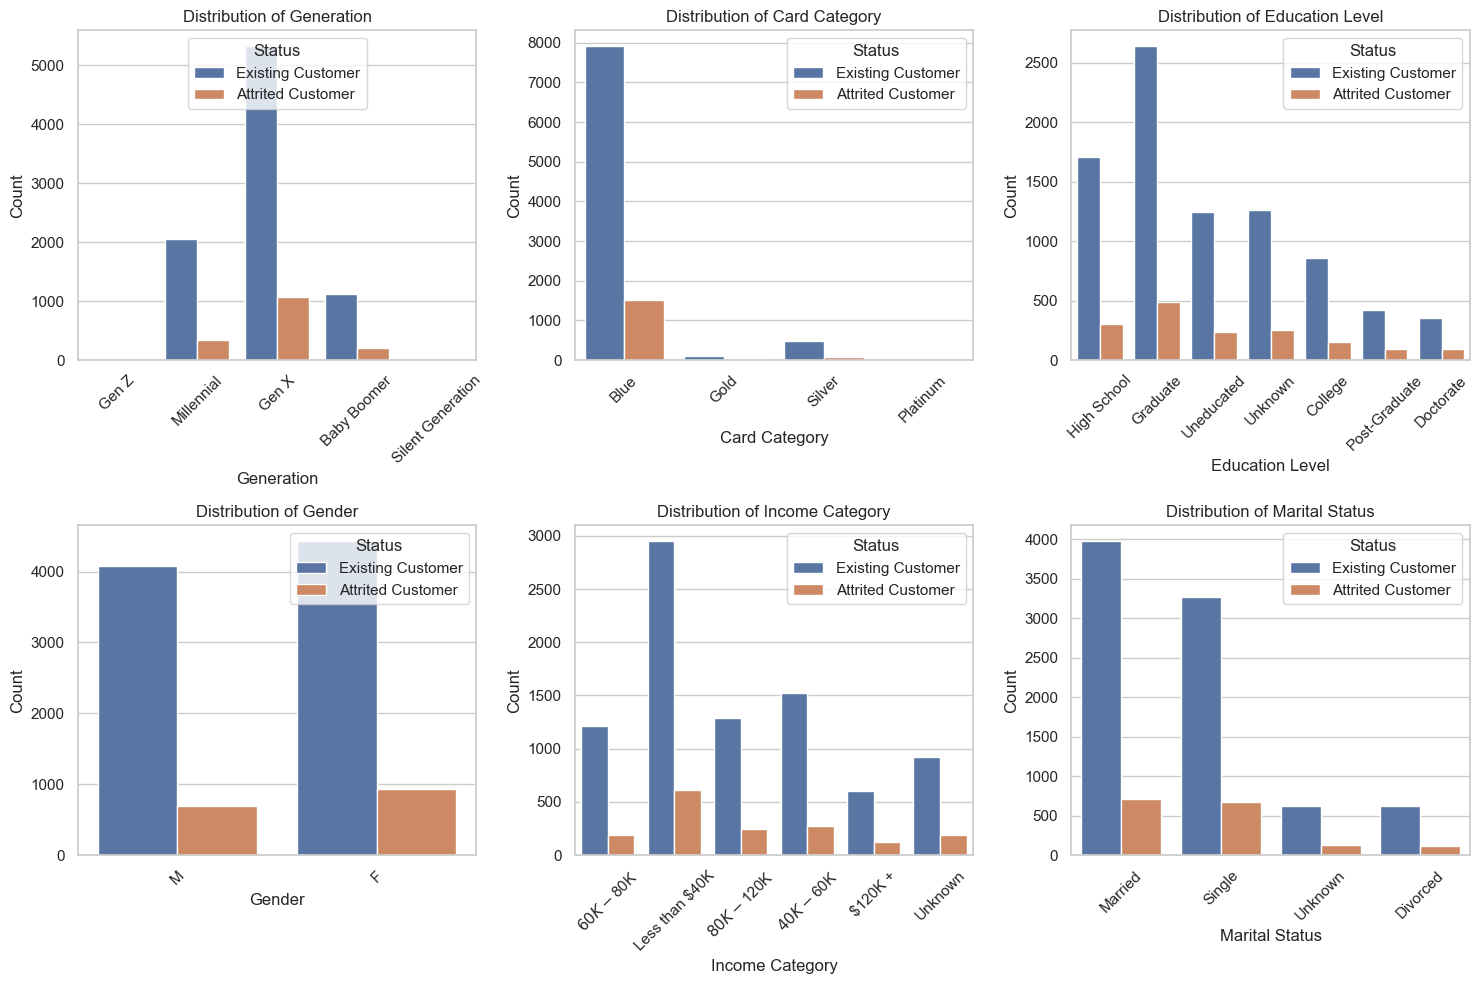

In [162]:
categorical_columns = ['Generation', 'Card Category', 'Education Level', 'Gender', 'Income Category', 'Marital Status']
num_plots = len(categorical_columns)
num_rows = 2
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Flatten the axes array to easily iterate over subplots
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    ax = axes[i]
    sns.countplot(x=col, data=df, hue='Status', ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.legend(title='Status')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels by 45 degrees

# Remove any unused subplots
if num_plots < num_rows * num_cols:
    for j in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [163]:
# # Visualize the distribution of categorical features
# categorical_columns = ['Generation', 'Card Category', 'Education Level', 'Gender', 'Income Category', 'Marital Status']
# for col in categorical_columns:
#     plt.figure(figsize=(8, 6))
#     sns.countplot(x=col, data=df, hue='Status')
#     plt.title(f'Distribution of {col}')
#     plt.show()

In [165]:
def compare_kdeplots(df, col, hue=None):
    plt.figure(figsize=(8, 6))
    sns.histplot(df[df['Status'] == 'Existing Customer'][col], label='Existing Customer', kde=True, hue=hue)
    sns.histplot(df[df['Status'] == 'Attrited Customer'][col], label='Attrited Customer', kde=True, hue=hue)
    plt.title(f'Distribution of {col} by Customer Status')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend()
    plt.show()

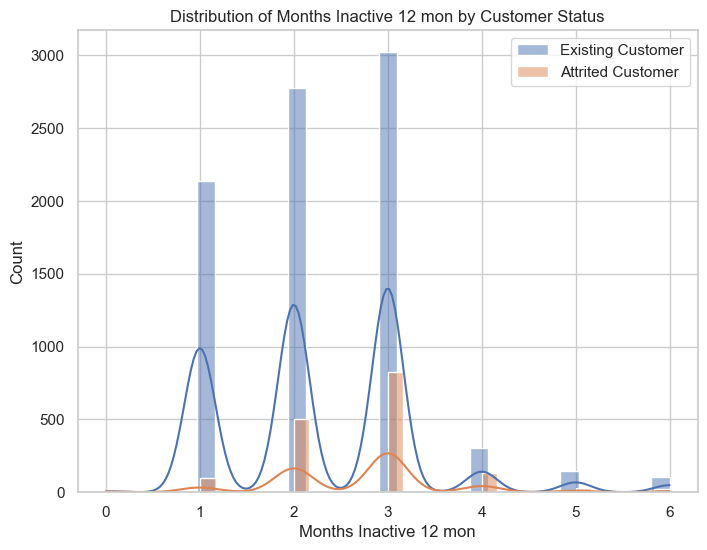

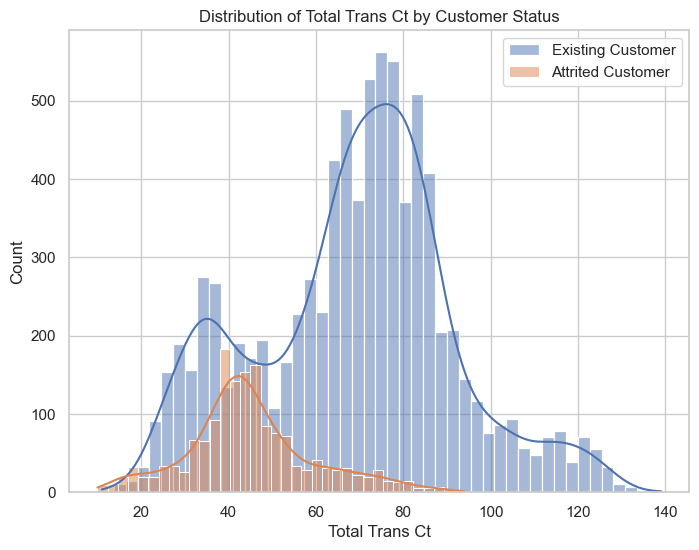

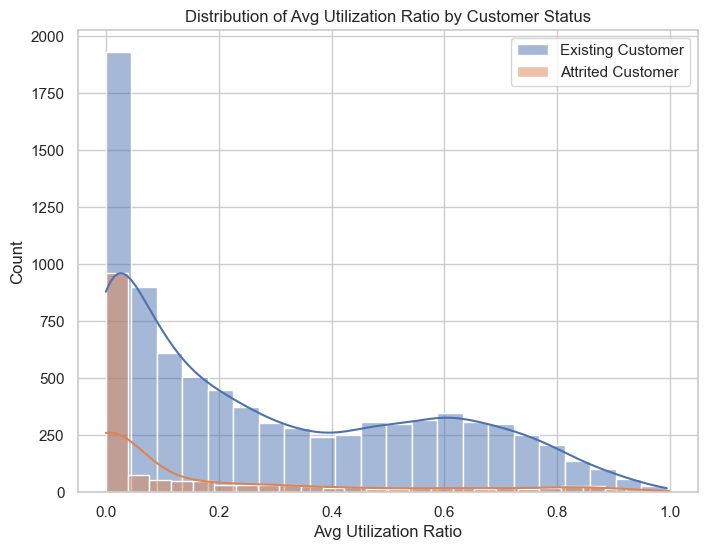

In [166]:
for col in ['Months Inactive 12 mon', 'Total Trans Ct', 'Avg Utilization Ratio']:
    compare_kdeplots(df, col)